
1.Introduction
This assignment will help you to consolidate the concepts learnt in the
session.

2.Problem Statement
Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.
Loading Data and modules



You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.
NOTE:ThesolutionsharedthroughGithubshouldcontainthesource
codeusedand thescreenshotoftheoutput.
3. Output
This assignment consists of 200 marks and has to be submitted in
.ipynb/PDF format in the upcoming session for evaluation.

"""

### Collecting Data

In [36]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report


In [37]:
Url=r"titanic.csv"
titanic = pd.read_csv(Url)
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ti\
cket','Fare','Cabin','E mbarked']


In [38]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.


In [39]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'E mbarked'],
      dtype='object')

In [40]:
input_feature=['Pclass','Age','Sex','SibSp','Parch','Fare']

In [41]:
X,y=titanic[input_feature],titanic['Survived']

In [42]:
X.head()

,Pclass,Age,Sex,SibSp,Parch,Fare
0,3,22.0,male,1,0,7.2500
1,1,38.0,female,1,0,71.2833
2,3,26.0,female,0,0,7.9250
3,1,35.0,female,1,0,53.1000
4,3,35.0,male,0,0,8.0500


In [43]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Data Wrangling:

Data wrangling is the process of converting data from initial format to a format that may be better for analysis

#### Identify and handle missing values

In [44]:
import missingno as msno

<Figure size 1080x864 with 0 Axes>

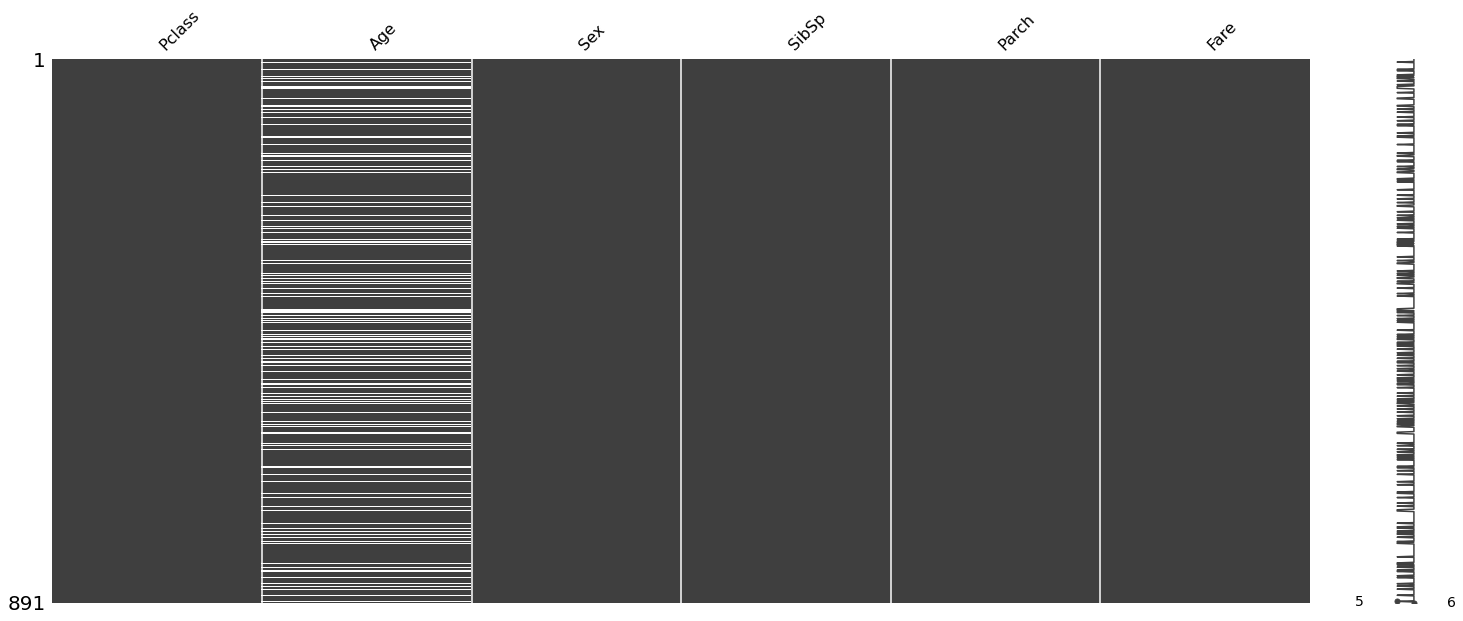

In [45]:
plt.figure(figsize=(15,12))
msno.matrix(X)

In [46]:
#we have missing values in age column

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   Sex     891 non-null    object 
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [48]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [49]:
X['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [50]:
import seaborn as sns

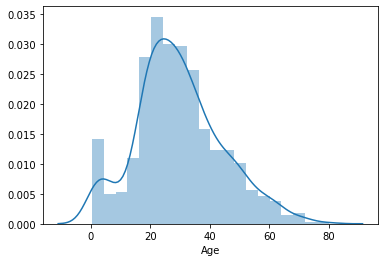

In [51]:
sns.distplot(X['Age'])

In [52]:
from sklearn.impute import SimpleImputer

In [53]:
imputer=SimpleImputer()

In [54]:
imputed_age=imputer.fit_transform(X[['Age']])

In [56]:
X['imputed_Age']=imputed_age

<ipython-input-56-0aa158a0ad46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['imputed_Age']=imputed_age


In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Age          714 non-null    float64
 2   Sex          891 non-null    object 
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   imputed_Age  891 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 48.9+ KB


In [58]:
X['imputed_Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: imputed_Age, Length: 891, dtype: float64

In [59]:
X=X.drop('Age',axis=1).rename(columns={"imputed_Age":"Age"})

#### We have removed null values in our data set

In [60]:
X.describe(include="all")

,Pclass,Sex,SibSp,Parch,Fare,Age
count,891.000000,891,891.000000,891.000000,891.000000,891.000000
unique,NaN,2,NaN,NaN,NaN,NaN
top,NaN,male,NaN,NaN,NaN,NaN
freq,NaN,577,NaN,NaN,NaN,NaN
mean,2.308642,NaN,0.523008,0.381594,32.204208,29.699118
std,0.836071,NaN,1.102743,0.806057,49.693429,13.002015
min,1.000000,NaN,0.000000,0.000000,0.000000,0.420000
25%,2.000000,NaN,0.000000,0.000000,7.910400,22.000000
50%,3.000000,NaN,0.000000,0.000000,14.454200,29.699118
75%,3.000000,NaN,1.000000,0.000000,31.000000,35.000000


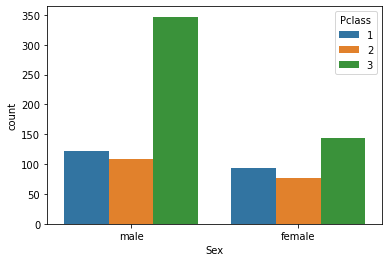

In [61]:
sns.countplot(X['Sex'],hue=X['Pclass'])
plt.show()

Graph depict that most of male are in Passenger class 3 

##### Let's check who died more male or female?

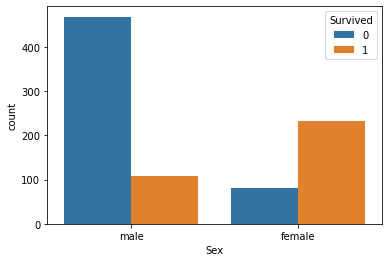

In [62]:
sns.countplot(X['Sex'],hue=y)

### Conclusion:

Count of male dead gender is high as compare to female.

we will check the proportion male and female in our dataset

In [63]:
gender_count=X.groupby(by=["Sex"]).count().loc[['female','male'],['Pclass']].values

In [64]:
gender_label=X.groupby(by=["Sex"]).count().loc[['female','male'],['Pclass']].index

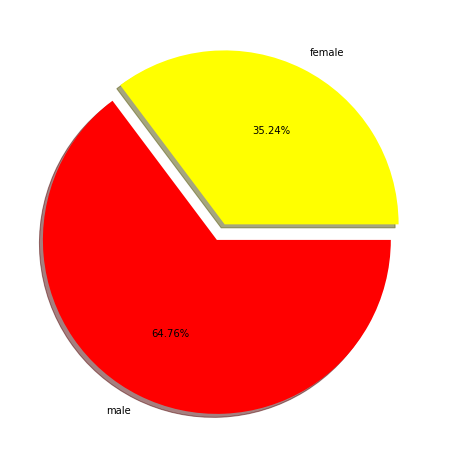

In [65]:
plt.figure(figsize=(10,8))
plt.pie(gender_count.flatten(),labels=gender_label,explode=[0,0.1],shadow=True,autopct="%.2f%%",colors=['yellow','red'])

plt.show()

Let's calculate percentage of male and female died.

In [66]:
total_gender_count=dict(X['Sex'].value_counts())

In [67]:
total_gender_count

{'male': 577, 'female': 314}

In [68]:
# selecting died count based on gender
total_gender_died=dict(X[y==0]['Sex'].value_counts())

In [69]:
total_gender_died

{'male': 468, 'female': 81}

In [70]:
per_male_died=total_gender_died['male']*100/total_gender_count['male']
per_female_died=total_gender_died['female']*100/total_gender_count['female']

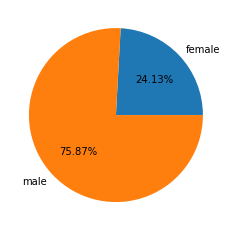

In [71]:
plt.pie([per_female_died,per_male_died],labels=["female","male"],autopct='%.2f%%')
plt.show()

Conclusion: Almost more than 75% of male died who are in titanic ship, and 24% of female died

### Let's find out which class passenger died most

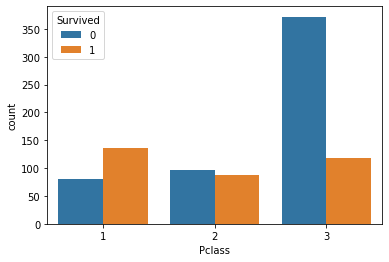

In [72]:
sns.countplot(X['Pclass'],hue=y)

Conclusion: Mostly male person died from passenger class 3 

In [73]:
X.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age'], dtype='object')

In [74]:
X['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

## Convert Categorical variable 

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
 5   Age     891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [76]:
# as gender does not have any sequence hence we will use get dummy variable


In [77]:
X=X.join(pd.get_dummies(X['Sex'],prefix="Sex")['Sex_female'])

In [78]:
X.drop("Sex",axis=1,inplace=True)

In [79]:
X

,Pclass,SibSp,Parch,Fare,Age,Sex_female
0,3,1,0,7.2500,22.000000,0
1,1,1,0,71.2833,38.000000,1
2,3,0,0,7.9250,26.000000,1
3,1,1,0,53.1000,35.000000,1
4,3,0,0,8.0500,35.000000,0
...,...,...,...,...,...,...
886,2,0,0,13.0000,27.000000,0
887,1,0,0,30.0000,19.000000,1
888,3,1,2,23.4500,29.699118,1
889,1,0,0,30.0000,26.000000,0


### Decision tree does not require scaling on input feature and this is advantage also. You can use PCA so that decsion try will be able to draw boundary perfectly but for now we will directly implement Decision tree.



In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt_clf=DecisionTreeClassifier()

In [82]:
from sklearn.model_selection import train_test_split


In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [85]:
yhat_train=dt_clf.predict(X_train)

In [86]:
from sklearn.metrics import plot_confusion_matrix

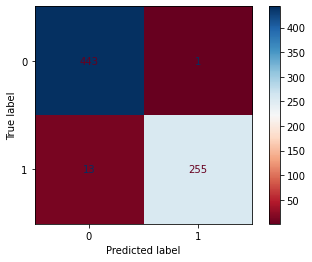

enter -ve number if you like confusion matrix color2


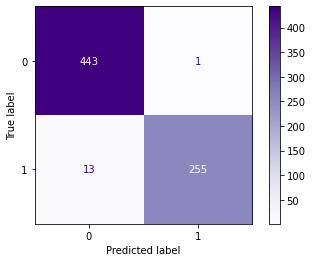

enter -ve number if you like confusion matrix color-1


In [87]:
i=1

while i>0:
    plot_confusion_matrix(dt_clf,X_train,y_train,cmap=plt.get_cmap(plt.colormaps()[np.random.randint(1,len(plt.colormaps())-1)]))
    plt.show()
    i=int(input("enter -ve number if you like confusion matrix color"))

In [88]:
from sklearn.metrics import precision_recall_curve,precision_score,recall_score,roc_auc_score,roc_curve,f1_score,jaccard_score

### Training Accuracy

In [91]:
print("Precison score--->",precision_score(y_train,yhat_train))
print("recall score-->",recall_score(y_train,yhat_train))
print("f1 score--->",f1_score(y_train,yhat_train))
print("Jaccard score",jaccard_score(y_train,yhat_train))
print("Score",dt_clf.score(X_train,y_train))

Precison score---> 0.99609375
recall score--> 0.9514925373134329
f1 score---> 0.9732824427480916
Jaccard score 0.9479553903345725
Score 0.9803370786516854


### Testing Accuracy

In [93]:
yhat_test=dt_clf.predict(X_test)

In [94]:
print("Precison score--->",precision_score(y_test,yhat_test))
print("recall score-->",recall_score(y_test,yhat_test))
print("f1 score--->",f1_score(y_test,yhat_test))
print("Jaccard score",jaccard_score(y_test,yhat_test))
print("Score",dt_clf.score(X_test,y_test))

Precison score---> 0.704225352112676
recall score--> 0.6756756756756757
f1 score---> 0.689655172413793
Jaccard score 0.5263157894736842
Score 0.7486033519553073


Ohh! our model is overfitted so let's optimize it using grid search cv, but before that we will do feaute scaling and PCA

In [95]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)

In [98]:
from sklearn.decomposition import PCA
pca=PCA()
pricipal_component=pca.fit_transform(X_train)

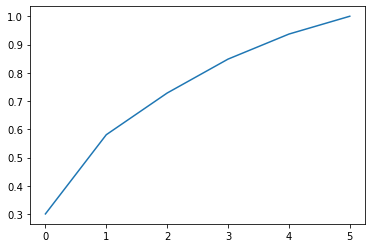

In [99]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [101]:
#we will keep all columns even thought we have not reduce dimension of our data
# but performing PCA is very useful in DT as it transform our data parellel to axis
#and Decision tree crate boundry as orthogonal.

X_train=pricipal_component

In [104]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
grid_dt=GridSearchCV(dt_clf,param_grid=grid_param,cv=5,n_jobs=-1,verbose=0.1)

In [107]:
grid_dt.fit(X_train,y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 13064 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 42638 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 43200 out of 43200 | elapsed:   31.8s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=0.1)

In [108]:
from sklearn.tree import export_graphviz

f=open('iris.dot','w')

export_graphviz(tree_clf,
                out_file=f,
               feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True
               )

In [277]:
with open('TitaticDTOVERFITTING.dot','w') as f:
    export_graphviz(dt_clf,out_file=f,
                   feature_names=X.columns,
                   class_names=['not Survived','Survived'],
                    rounded=True,
                    filled=True
                   )

In [109]:
from graphviz import Source

In [279]:
output=Source.from_file('TitaticDTOVERFITTING.dot',format="png")


In [292]:
output.save('decision')
output.view()

'decision.png'

In [110]:
import PIL

In [111]:
decision_tree_image=PIL.Image.open(r'decision.png')

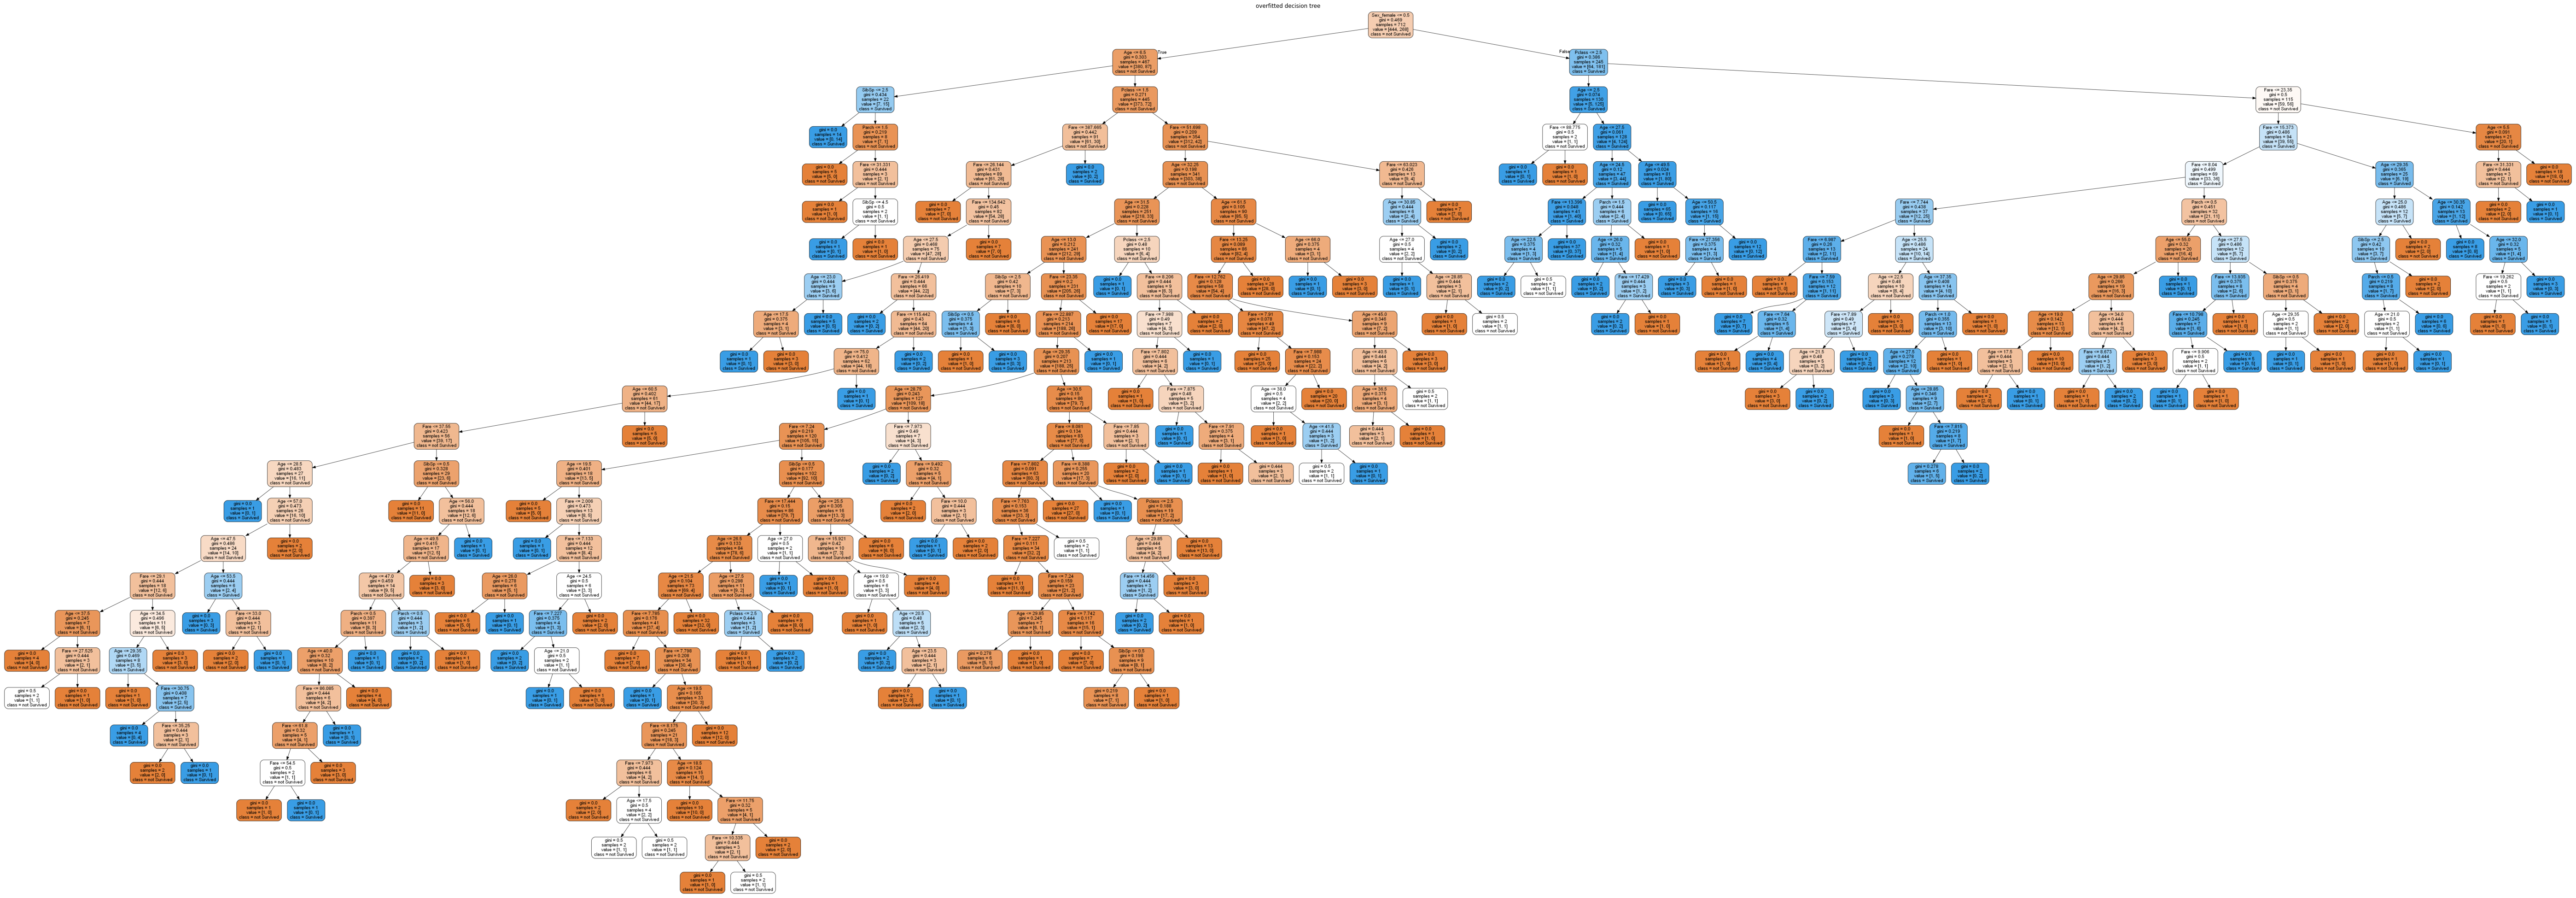

In [112]:
plt.figure(figsize=(100,100))
plt.title("overfitted decision tree")
plt.imshow(decision_tree_image)
plt.axis(False)
plt.savefig("Overfitted decision Tree")

In [113]:
grid_dt.best_params_

{'criterion': 'gini',
 'max_depth': 19,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [131]:
grid_dt.best_score_

0.824386880724909

In [114]:
#Best paramater

dt_clf_refine=DecisionTreeClassifier(max_depth=19,min_samples_leaf=2,min_samples_split=2,splitter='random')

In [115]:
dt_clf_refine.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=19, min_samples_leaf=2, splitter='random')

### Training Accuracy

In [128]:
print("Precison score--->",precision_score(y_train,yhat_train))
print("recall score-->",recall_score(y_train,yhat_train))
print("f1 score--->",f1_score(y_train,yhat_train))
print("Jaccard score",jaccard_score(y_train,yhat_train))
print("Score",dt_clf_refine.score(X_train,y_train))

Precison score---> 0.99609375
recall score--> 0.9514925373134329
f1 score---> 0.9732824427480916
Jaccard score 0.9479553903345725
Score 0.8904494382022472


## Testing Accuracy

In [ ]:
X_test=scale.transform(X_test)

In [119]:
X_test=pca.transform(X_test)
yhat_test=dt_clf_refine.predict(X_test)

In [130]:
print("Precison score--->",precision_score(y_test,yhat_test))
print("recall score-->",recall_score(y_test,yhat_test))
print("f1 score--->",f1_score(y_test,yhat_test))
print("Jaccard score",jaccard_score(y_test,yhat_test))
print("Score",dt_clf_refine.score(X_test,y_test))

Precison score---> 0.7538461538461538
recall score--> 0.6621621621621622
f1 score---> 0.7050359712230215
Jaccard score 0.5444444444444444
Score 0.770949720670391


In [122]:
with open("RefineDT","w") as f:
    export_graphviz(dt_clf_refine,out_file=f,
                feature_names=X.columns,
                    class_names=['Not survived','survived']
                    ,rounded=True,
                    filled=True
                
               
                   )

In [123]:
output=Source.from_file("RefineDT",format="png")

In [124]:
output.save("refine_dt")

'refine_dt'

In [125]:
output.view()

'refine_dt.png'

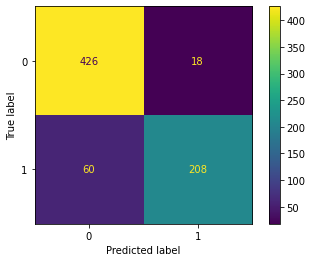

In [126]:
plot_confusion_matrix(dt_clf_refine,X_train,y_train)

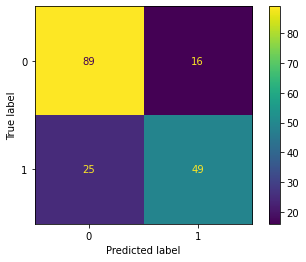

In [127]:
plot_confusion_matrix(dt_clf_refine,X_test,y_test)